In [1]:
import dpm.monte_carlo as monte_carlo
from dpm.distributions import Normal, Uniform, Arcsine
from dpm.visualize import plot_hist, plot_model
from matplotlib import pyplot as plt
import numpy as np

In [2]:
model = Normal(-7.3, 4.0)

In [3]:
def entropy(x):
    return -model.log_prob(x)

In [4]:
print(f"E[X]   : {monte_carlo.expectation(model).item():.2f}")
print(f"E[X^2] : {monte_carlo.variance(model).item():.2f}")
print(f"Entropy: {monte_carlo.monte_carlo(entropy, model).item():.2f}")
print(f"Median : {monte_carlo.median(model).item():.2f}")
print(f"P(X <= -7.3): {monte_carlo.cdf(model, -7.3):.2f}")
print(f"P(X <= -9): {monte_carlo.cdf(model, -9, batch_size=10000):.2f}")

E[X]   : -7.27
E[X^2] : 3.85
Entropy: 2.12
Median : -7.33
P(X <= -7.3): 0.49
P(X <= -9): 0.20


In [5]:
model = Uniform(-1, 1)

In [6]:
print(f"E[X]   : {monte_carlo.expectation(model).item():.2f}")
print(f"E[X^2] : {monte_carlo.variance(model).item():.2f}")
print(f"Entropy: {monte_carlo.monte_carlo(entropy, model).item():.2f}")
print(f"Median : {monte_carlo.median(model).item():.2f}")
print(f"P(X <= -7.3): {monte_carlo.cdf(model, -7.3):.2f}")
print(f"P(X <= -9): {monte_carlo.cdf(model, -9, batch_size=10000):.2f}")

E[X]   : 0.00
E[X^2] : 0.33
Entropy: 0.69
Median : 0.03
P(X <= -7.3): 0.00
P(X <= -9): 0.00


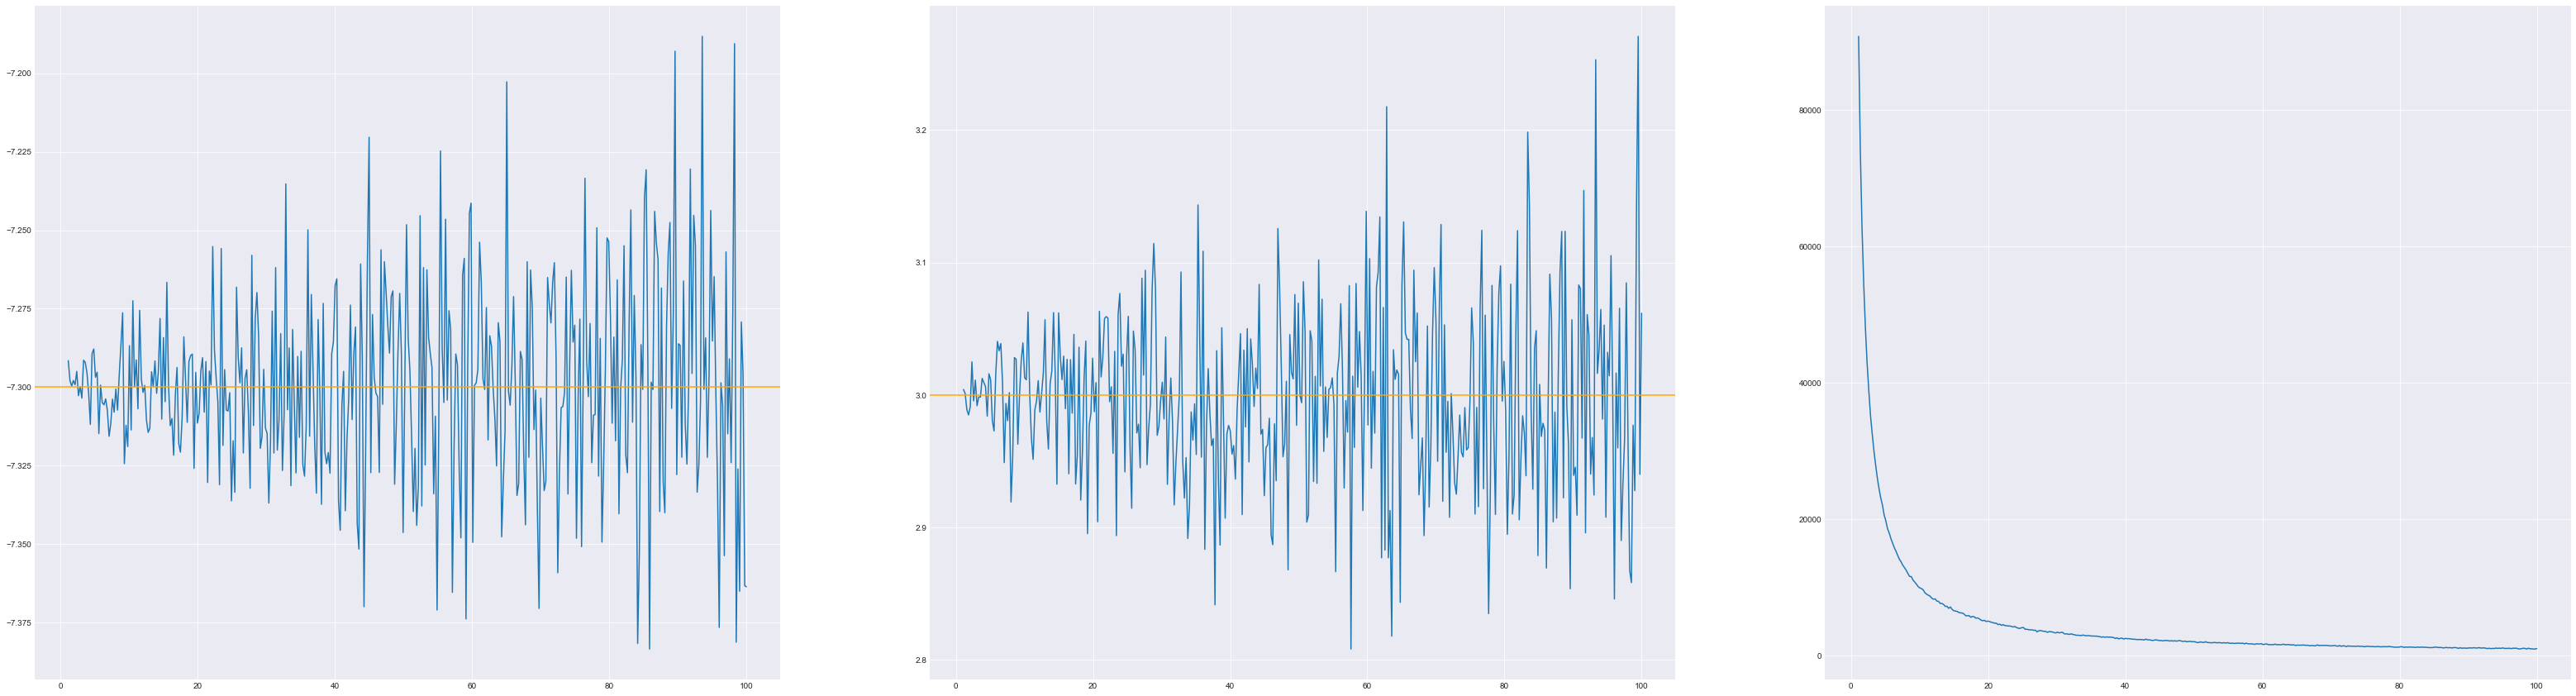

In [7]:
model = Normal([-7.3, -7.3], [3., 3.])
stats = {'mu':[], 'var':[], 'num_samples': []}
M = np.linspace(1.1, 100, 400)
for m in M:
    samples = monte_carlo.rejection_sampling(model, Normal([-7.3, -7.3], [3., 3.], learnable=False), m, 
                                             batch_size=100000)
    stats['mu'].append(samples.mean())
    stats['var'].append(samples.var())
    stats['num_samples'].append(samples.size(0))


fig, axes = plt.subplots(1, 3, figsize=(55, 15))
axes[0].plot(M, stats['mu'])
axes[0].axhline(-7.3, c='orange')

axes[1].plot(M, stats['var'])
axes[1].axhline(3, c='orange')

axes[2].plot(M, stats['num_samples'])
plt.show()






tensor([0.3069]) tensor([0.0317])
torch.Size([5586, 1])


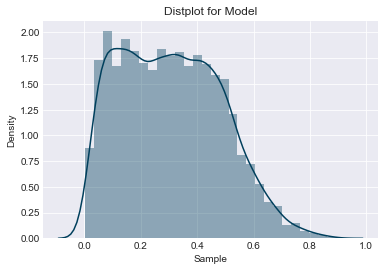

In [8]:
samples = monte_carlo.beta_sampling(2, 5)
print(samples.mean(0), samples.var(0))
print(samples.shape)
plot_hist(samples)

tensor([-0.4887]) tensor([2.9304])
torch.Size([4871, 1])


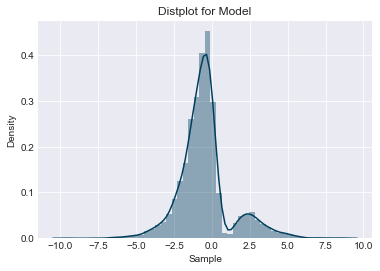

In [9]:
samples = monte_carlo.double_exponential()
print(samples.mean(0), samples.var(0))
print(samples.shape)
plot_hist(samples)

tensor(0.0071) tensor(1.0198)


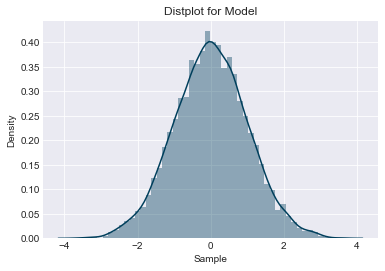

tensor(0.0052) tensor(1.0000)


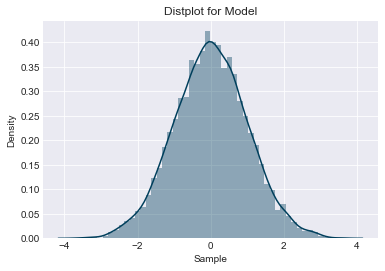

In [10]:
Z1, Z2 = monte_carlo.box_muller()
print(Z1.mean(), Z1.var())
plot_hist(Z1); plt.show()
print(Z2.mean(), Z2.var())
plot_hist(Z1); plt.show()

tensor(-0.0092) tensor(1.0310)


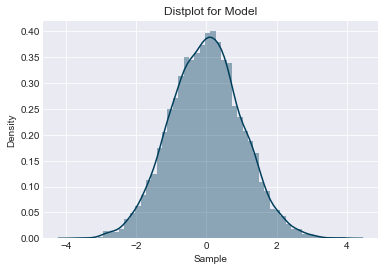

tensor(0.0005) tensor(0.9845)


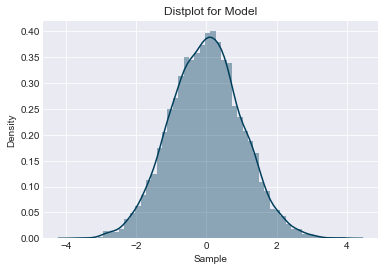

In [11]:
Z1, Z2 = monte_carlo.marsaglia_bray()
print(Z1.mean(), Z1.var())
plot_hist(Z1); plt.show()
print(Z2.mean(), Z2.var())
plot_hist(Z1); plt.show()

In [12]:
def exponential(F,lam=4):
    return -(1-F).log() / lam

In [13]:
samples = monte_carlo.inverse_sampling(exponential)

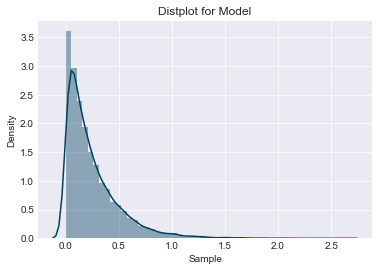

In [14]:
plot_hist(samples)

In [118]:
from scipy.stats import ks_2samp
from dpm.distributions import Uniform

def cdf(x):
    return x

normal_samples = Uniform().sample(10000).detach().view(-1)
samples = monte_carlo.rand(batch_size=10000).view(-1)

s, p = ks_2samp(samples.numpy(), normal_samples.numpy())
print(s, p)

0.009500000000000008 0.7557343977716486
